[Read the tutorial](https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/)

In [1]:
%cd /content/drive/My Drive/Project/Data Science/PeduliLindungi Sentimen Analisis

/content/drive/My Drive/Project/Data Science/PeduliLindungi Sentimen Analisis


In [3]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.0.3.0-cp36-none-any.whl size=21947 sha256=9b0a8210c8d7de7bd67f953ee124a491dfd19458b4b105eac71ff5cf63aa2655
  Stored in directory: /root/.cache/pip/wheels/34/0d/1a/cd5993428dc7c5710ed5b2201ba7c0f3f14f80c951e4bde14e
Successfully built google-play-scraper


In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [5]:
app_packages = [
  'com.telkom.tracencare',
]

In [6]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


In [7]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos)

[
  {
    "adSupported": null,
    "androidVersion": "5.0",
    "androidVersionText": "5.0 and up",
    "appId": "com.telkom.tracencare",
    "containsAds": null,
    "contentRating": "Everyone",
    "contentRatingDescription": null,
    "currency": "USD",
    "description": "Aplikasi PeduliLindungi adalah aplikasi yang dirancang Kementerian Komunikasi dan Informatika (Kominfo) dan Kementerian BUMN untuk digunakan Kementerian Kesehatan dan Gugus Tugas dalam mengatasi pandemi COVID-19 di Indonesia. \r\n\r\nPeduliLindungi adalah aplikasi yang dikembangkan untuk menghentikan penularan Coronavirus Disease (COVID-19). Aplikasi ini mengandalkan kepedulian (peduli) dan partisipasi masyarakat untuk saling membagikan data lokasinya saat bepergian agar penelusuran riwayat kontak dengan penderita COVID-19 dapat dilakukan.\r\n\r\nPeduliLindungi menggunakan bluetooth Anda untuk merekam informasi yang dibutuhkan. Pertukaran data akan terjadi ketika ada gadget lain dalam radius bluetooth yang juga te

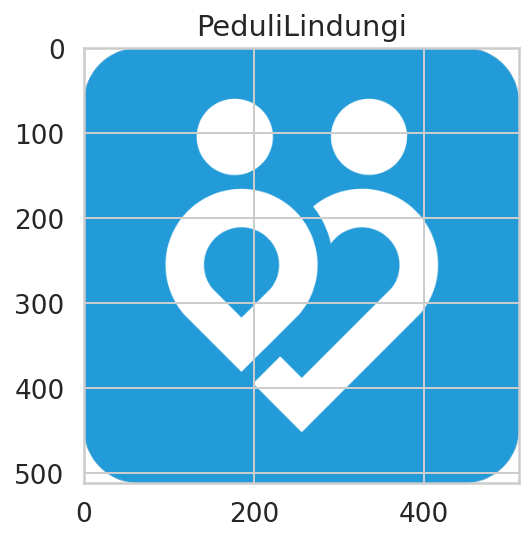

In [9]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:]

apps = app_infos[0]

img = apps['icon']
app_title = format_title(apps['title'])

img = plt.imread(img)
plt.title(app_title)
plt.imshow(img)

In [10]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [11]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='id',
        country='id',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

print(len(app_reviews))

100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

1200


In [12]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df['content']

0       Gak bisa kirim OTP, padahal henpon saya samsun...
1       Ga bisa kirim OTP, katanya tidak ada koneksi i...
2       Beberapa kelurahan yang berada di wilayah kerj...
3       DATA DARIMANA KELURAHAN KAMI KOK BISA MASUK ZO...
4       Maaf sebelumnya adanya amplikasi ini apakah su...
                              ...                        
1195                                                  Oke
1196                                              Manfaat
1197    Aplikasinya gimana ina ko tidak bisa masuk pad...
1198                                                 Good
1199                                           Yg terbaik
Name: content, Length: 1200, dtype: object

In [13]:
app_reviews_df.to_csv('app_reviews.csv', index=None, header=True)